**LETS GROW MORE INTERNSHIP - AUGUST 2023**\
**TASK - MUSIC RECOMMENDATION**\
**NINAD NILESH SUGANDHI**

Importing Libraries

In [195]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error,accuracy_score, mean_absolute_error, f1_score, r2_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [169]:
train = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\music recommendation\\train.csv")
test = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\music recommendation\\test.csv")
songs = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\music recommendation\\songs.csv")
members = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\music recommendation\\members.csv")
sample = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\music recommendation\\sample_submission.csv")

**Data Preprocessing**

In [3]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [7]:
sample.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
1048570,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,my library,Local playlist more,local-library,0
1048571,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,discover,Discover Chart,online-playlist,1
1048572,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,discover,Discover Chart,online-playlist,1
1048573,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Online playlist more,online-playlist,1
1048574,kXkMzhyacFrtSI922IBs0BcmNxKedV4+837lljPNTQA=,jHMqK5wu5C0txl0QCxpkSM1xbIev60ii+dc99LXu8EI=,discover,Online playlist more,online-playlist,1


In [9]:
test.tail()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
1048570,1048570,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,WGGGNQ/g+Z+3CvYBSiL5PAXI8MqNApAT+skNJiHm1mE=,discover,Album more,album
1048571,1048571,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,Ka7MiMDNrrXKDOF468tyHz2c6aruoe4K4YH9O21kIrM=,discover,Album more,album
1048572,1048572,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,WnX1xlQ8vaDlSal2wzPiJYfaJZex76ya7wvlphajEOU=,discover,Album more,album
1048573,1048573,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,CSpYNBusxUao3QvX8hb7kse7X9o7d/QDE3NPlydjLqI=,discover,Album more,album
1048574,1048574,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,3oktJO/2MngRxpaCJPHL2XXUICv+DqonwhUj270cFSY=,discover,Album more,album


In [10]:
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [11]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [12]:
sample.tail()

,id,target
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5
2556789,2556789,0.5


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   msno                1048575 non-null  object
 1   song_id             1048575 non-null  object
 2   source_system_tab   1045469 non-null  object
 3   source_screen_name  1000397 non-null  object
 4   source_type         1045873 non-null  object
 5   target              1048575 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   id                  1048575 non-null  int64 
 1   msno                1048575 non-null  object
 2   song_id             1048575 non-null  object
 3   source_system_tab   1045122 non-null  object
 4   source_screen_name  985099 non-null   object
 5   source_type         1045571 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [16]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [17]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   target  float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB


In [18]:
train.info

<bound method DataFrame.info of                                                  msno  \
0        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
...                                               ...   
1048570  xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=   
1048571  P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=   
1048572  P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=   
1048573  FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=   
1048574  kXkMzhyacFrtSI922IBs0BcmNxKedV4+837lljPNTQA=   

                                              song_id source_system_tab  \
0        BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1        bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2        JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=     

In [19]:
test.info

<bound method DataFrame.info of               id                                          msno  \
0              0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1              1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2              2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3              3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4              4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
...          ...                                           ...   
1048570  1048570  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048571  1048571  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048572  1048572  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048573  1048573  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048574  1048574  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   

                                              song_id source_system_tab  \
0        WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1        y/rsZ9DC7FwK5F2P

In [20]:
songs.info

<bound method DataFrame.info of                                               song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

       

In [21]:
members.info

<bound method DataFrame.info of                                                msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                2

In [22]:
sample.info

<bound method DataFrame.info of               id  target
0              0     0.5
1              1     0.5
2              2     0.5
3              3     0.5
4              4     0.5
...          ...     ...
2556785  2556785     0.5
2556786  2556786     0.5
2556787  2556787     0.5
2556788  2556788     0.5
2556789  2556789     0.5

[2556790 rows x 2 columns]>

In [23]:
train.describe

<bound method NDFrame.describe of                                                  msno  \
0        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
...                                               ...   
1048570  xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=   
1048571  P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=   
1048572  P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=   
1048573  FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=   
1048574  kXkMzhyacFrtSI922IBs0BcmNxKedV4+837lljPNTQA=   

                                              song_id source_system_tab  \
0        BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1        bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2        JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=   

In [24]:
test.describe()

,id
count,1.048575e+06
mean,5.242870e+05
std,3.026977e+05
min,0.000000e+00
25%,2.621435e+05
50%,5.242870e+05
75%,7.864305e+05
max,1.048574e+06


In [25]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [26]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [27]:
sample.describe()

,id,target
count,2.556790e+06,2556790.0
mean,1.278394e+06,0.5
std,7.380818e+05,0.0
min,0.000000e+00,0.5
25%,6.391972e+05,0.5
50%,1.278394e+06,0.5
75%,1.917592e+06,0.5
max,2.556789e+06,0.5


In [28]:
train.describe

<bound method NDFrame.describe of                                                  msno  \
0        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3        Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4        FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
...                                               ...   
1048570  xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=   
1048571  P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=   
1048572  P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=   
1048573  FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=   
1048574  kXkMzhyacFrtSI922IBs0BcmNxKedV4+837lljPNTQA=   

                                              song_id source_system_tab  \
0        BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1        bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2        JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=   

In [29]:
test.describe

<bound method NDFrame.describe of               id                                          msno  \
0              0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1              1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2              2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3              3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4              4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
...          ...                                           ...   
1048570  1048570  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048571  1048571  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048572  1048572  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048573  1048573  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   
1048574  1048574  J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=   

                                              song_id source_system_tab  \
0        WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1        y/rsZ9DC7FwK5F

In [30]:
songs.describe

<bound method NDFrame.describe of                                               song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

     

In [31]:
members.describe

<bound method NDFrame.describe of                                                msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7               

In [32]:
sample.describe

<bound method NDFrame.describe of               id  target
0              0     0.5
1              1     0.5
2              2     0.5
3              3     0.5
4              4     0.5
...          ...     ...
2556785  2556785     0.5
2556786  2556786     0.5
2556787  2556787     0.5
2556788  2556788     0.5
2556789  2556789     0.5

[2556790 rows x 2 columns]>

In [33]:
train.isnull()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [34]:
test.isnull()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [35]:
songs.isnull()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2296315,False,False,False,False,False,True,False
2296316,False,False,False,False,True,True,False
2296317,False,False,False,False,True,True,False
2296318,False,False,False,False,True,True,False


In [36]:
members.isnull()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
34398,False,False,False,True,False,False,False
34399,False,False,False,False,False,False,False
34400,False,False,False,True,False,False,False
34401,False,False,False,True,False,False,False


In [37]:
sample.isnull()

,id,target
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2556785,False,False
2556786,False,False
2556787,False,False
2556788,False,False


In [38]:
train.isnull().sum()

msno                      0
song_id                   0
source_system_tab      3106
source_screen_name    48178
source_type            2702
target                    0
dtype: int64

In [39]:
test.isnull().sum()

id                        0
msno                      0
song_id                   0
source_system_tab      3453
source_screen_name    63476
source_type            3004
dtype: int64

In [40]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [41]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [42]:
sample.isnull().sum()

id        0
target    0
dtype: int64

In [43]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [44]:
test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')

In [45]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [46]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [47]:
sample.columns

Index(['id', 'target'], dtype='object')

In [48]:
train.shape

(1048575, 6)

In [49]:
test.shape

(1048575, 6)

In [50]:
songs.shape

(2296320, 7)

In [51]:
members.shape

(34403, 7)

In [52]:
sample.shape

(2556790, 2)

**Data Visualization**\
Visualization techniques used are:
1. Countplot
2. Crosstab
3. Histogram
4. WordCloud
5. Pie Chart
6. Heat Map
7. Bar Plot

Text(0.5, 0, 'Source')

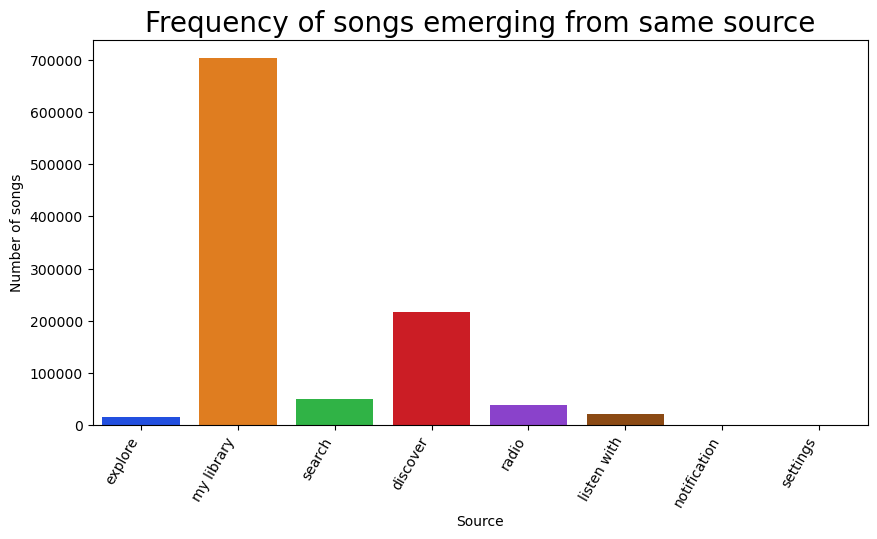

In [53]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='source_system_tab',data=train,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Frequency of songs emerging from same source',size=20)
plt.ylabel('Number of songs')
plt.xlabel('Source')

Text(0.5, 0, 'Source screen name')

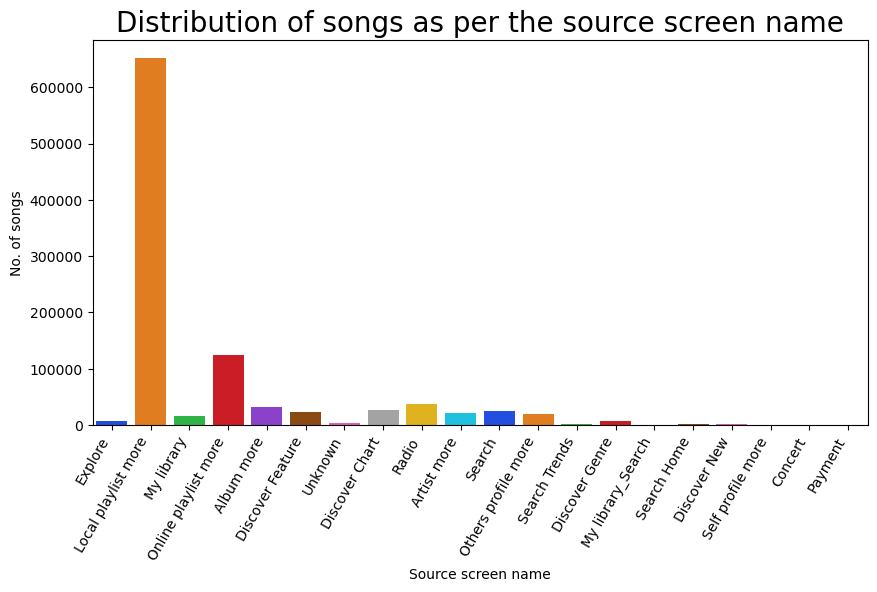

In [54]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='source_screen_name',data=train,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of songs as per the source screen name',size=20)
plt.ylabel('No. of songs')
plt.xlabel('Source screen name')

Text(0.5, 0, 'Source type')

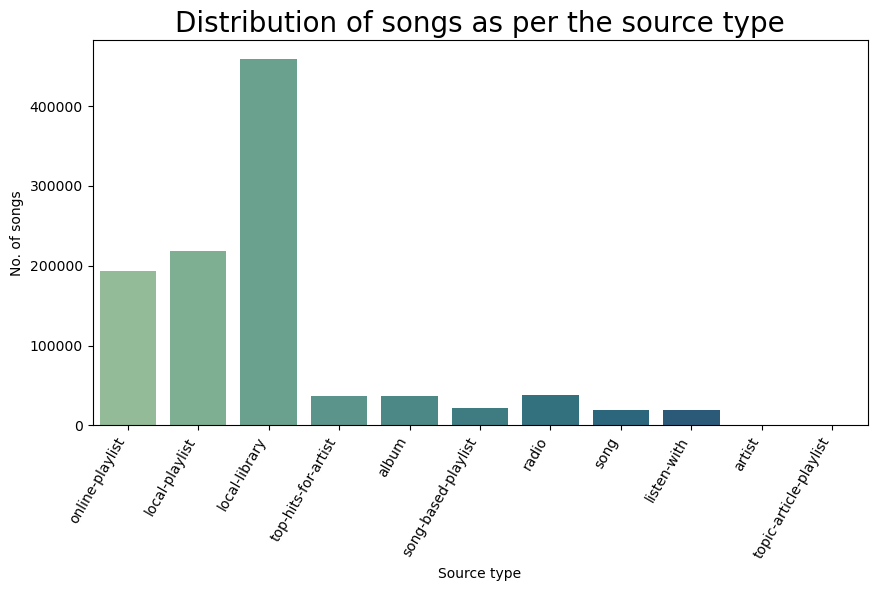

In [55]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='source_type',data=train,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of songs as per the source type',size=20)
plt.ylabel('No. of songs')
plt.xlabel('Source type')

Text(0.5, 0, 'Source system')

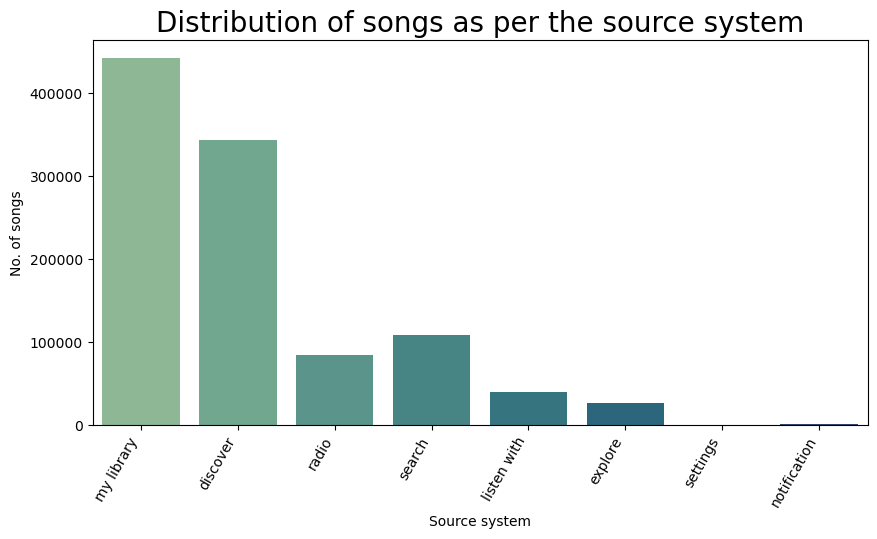

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='source_system_tab',data=test,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of songs as per the source system',size=20)
plt.ylabel('No. of songs')
plt.xlabel('Source system')

Text(0.5, 0, 'Source screen name')

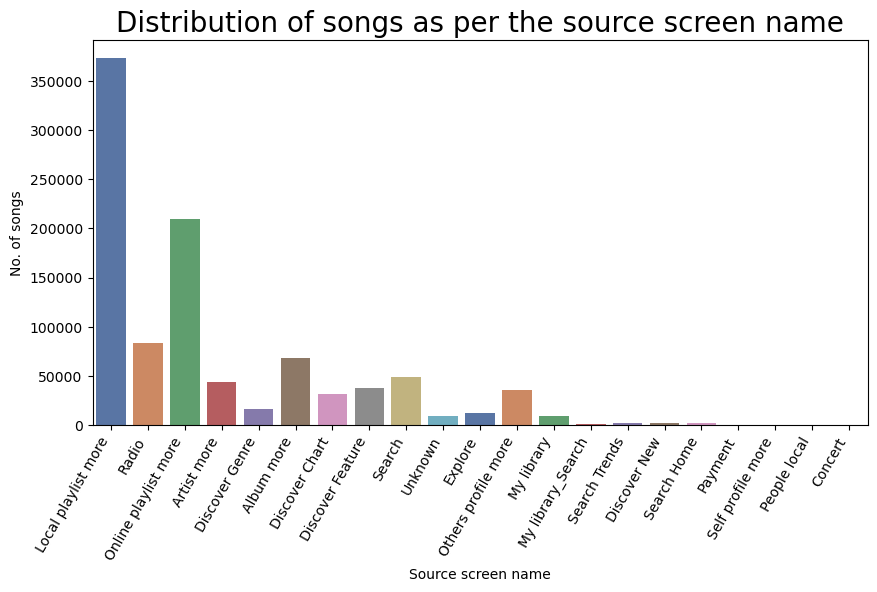

In [57]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='source_screen_name',data=test,palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of songs as per the source screen name',size=20)
plt.ylabel('No. of songs')
plt.xlabel('Source screen name')

Text(0.5, 0, 'Source type')

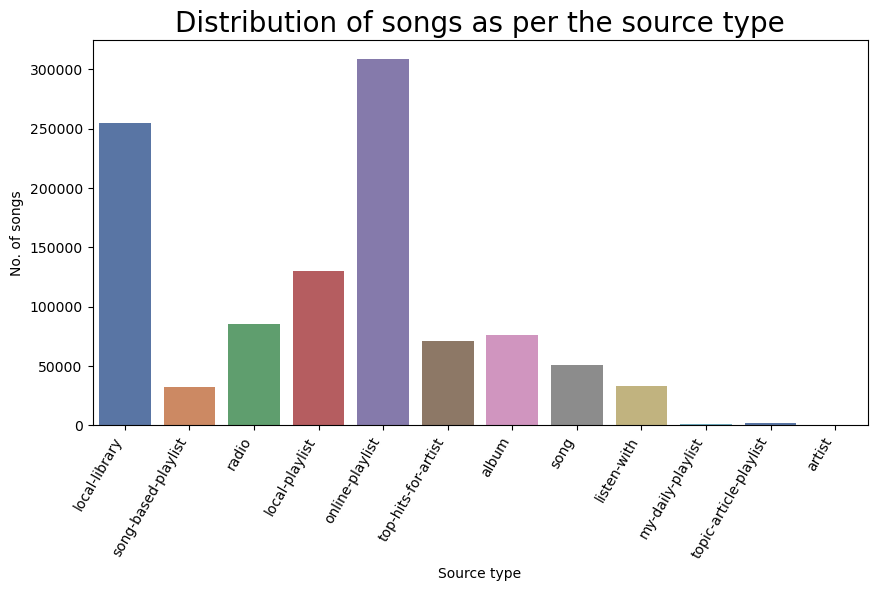

In [58]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='source_type',data=test,palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of songs as per the source type',size=20)
plt.ylabel('No. of songs')
plt.xlabel('Source type')

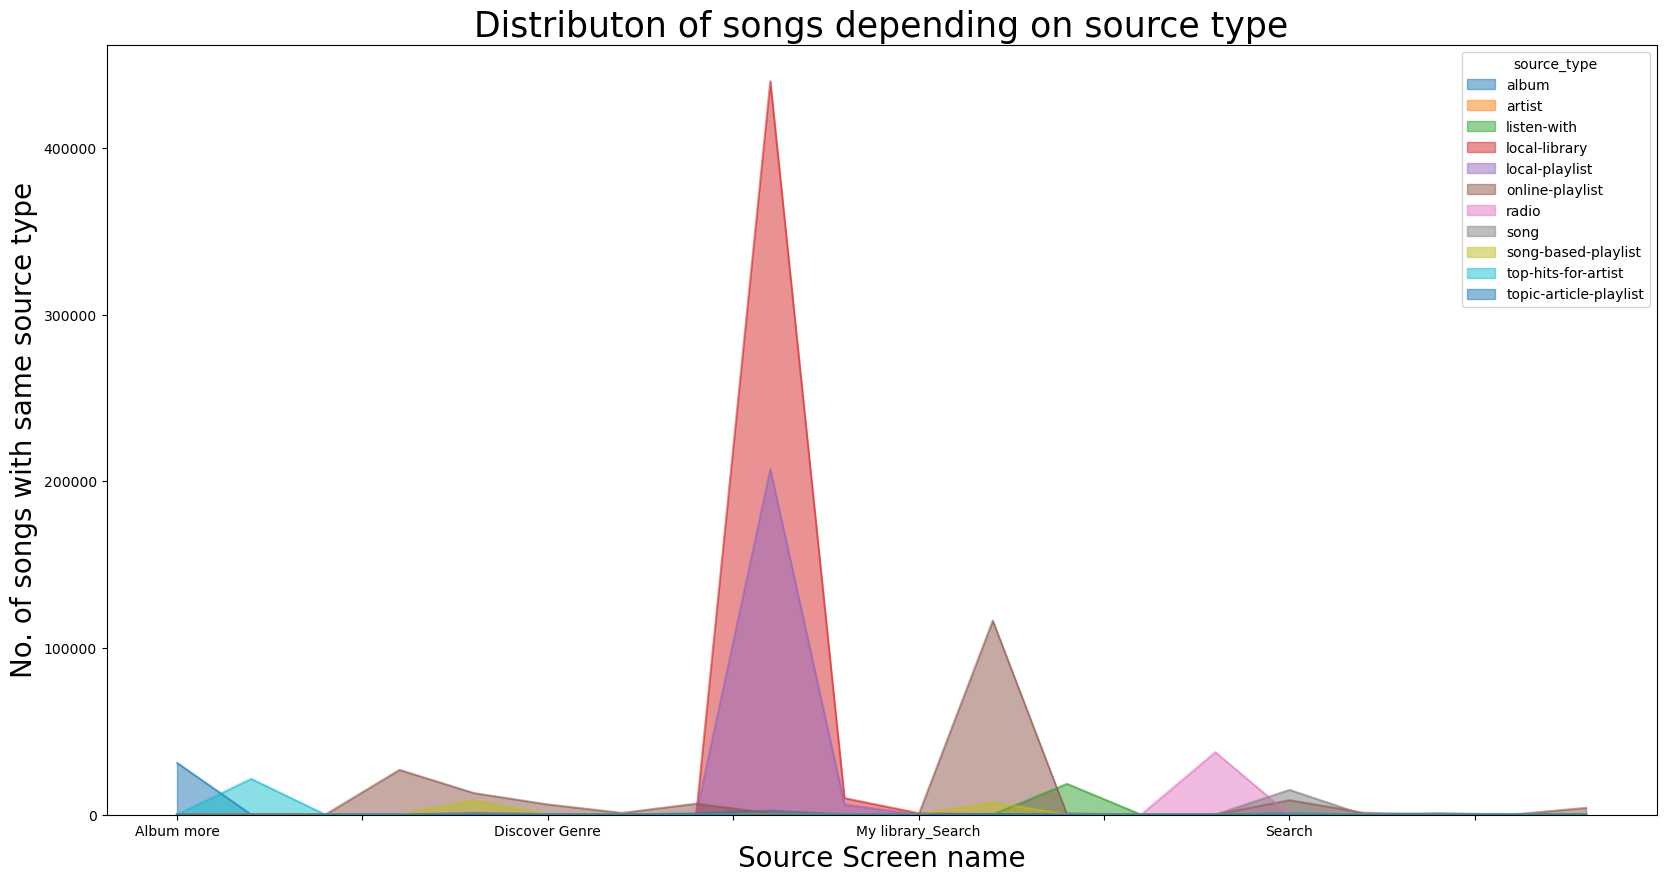

In [59]:
pd.crosstab(train.source_screen_name, train.source_type).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Distributon of songs depending on source type',fontsize=25)
plt.ylabel('No. of songs with same source type',fontsize=20)
plt.xlabel("Source Screen name",fontsize=20)
plt.show()

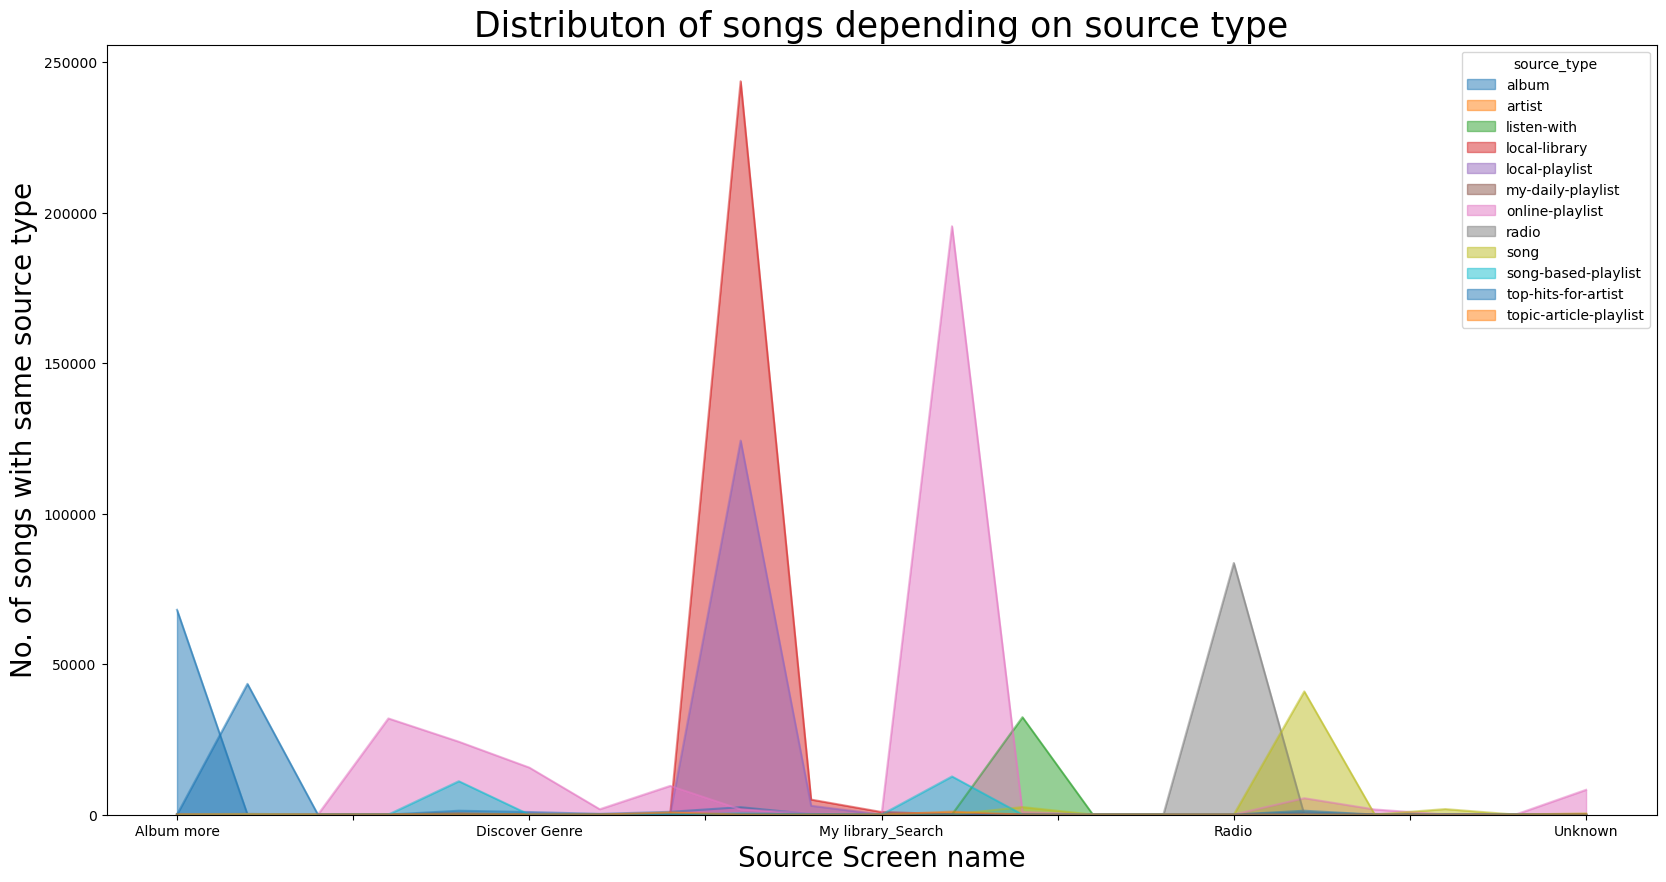

In [65]:
pd.crosstab(test.source_screen_name, test.source_type).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Distributon of songs depending on source type',fontsize=25)
plt.ylabel('No. of songs with same source type',fontsize=20)
plt.xlabel("Source Screen name",fontsize=20)
plt.show()

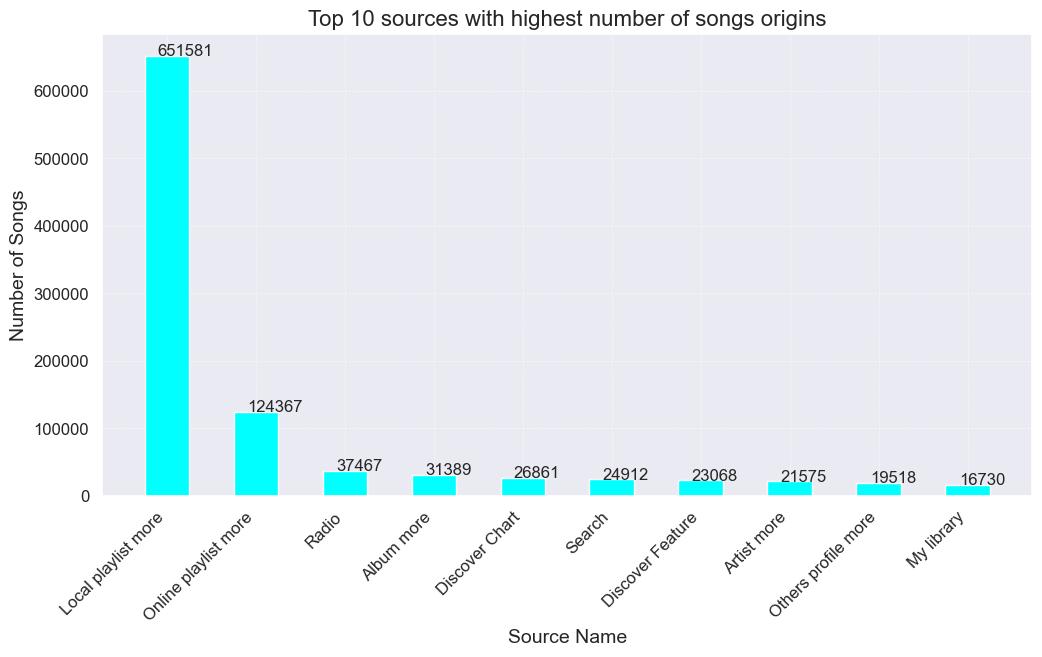

In [112]:
source_counts = train['source_screen_name'].value_counts().to_frame().sort_values('source_screen_name', axis=0, ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(source_counts.index, source_counts['source_screen_name'], color=['cyan'], width=0.5)

ax.set_title('Top 10 sources with highest number of songs origins', fontsize=16)
ax.set_xlabel('Source Name', fontsize=14)
ax.set_ylabel('Number of Songs', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(source_counts.index, rotation=45, ha='right')

for i, v in enumerate(source_counts['source_screen_name']):
    ax.text(i - 0.1, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

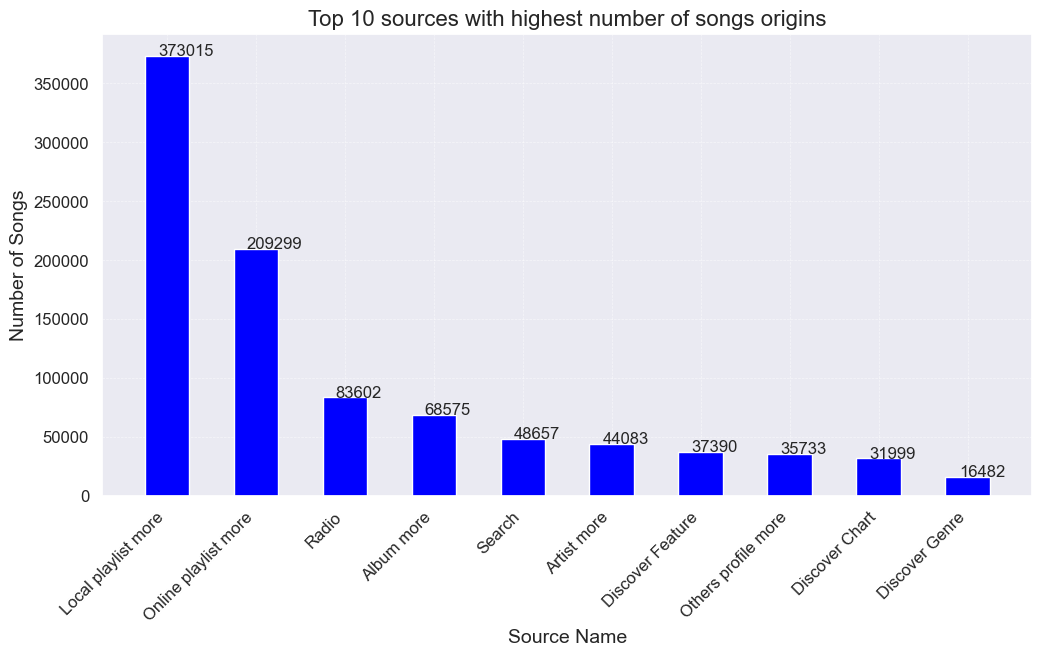

In [113]:
source_counts = test['source_screen_name'].value_counts().to_frame().sort_values('source_screen_name', axis=0, ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(source_counts.index, source_counts['source_screen_name'], color=['blue'], width=0.5)

ax.set_title('Top 10 sources with highest number of songs origins', fontsize=16)
ax.set_xlabel('Source Name', fontsize=14)
ax.set_ylabel('Number of Songs', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(source_counts.index, rotation=45, ha='right')

for i, v in enumerate(source_counts['source_screen_name']):
    ax.text(i - 0.1, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_3260\4110411688.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(source_screen_counts.index, rotation=60, ha='right')


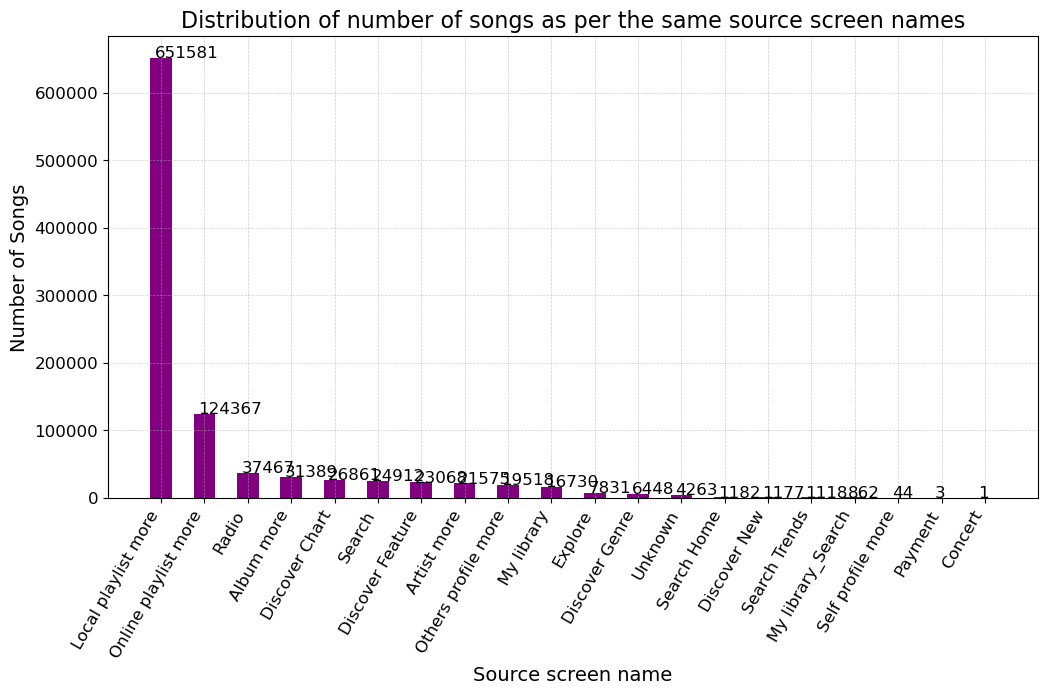

In [62]:
source_screen_counts = train['source_screen_name'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(source_screen_counts.index, source_screen_counts.values, color='purple', width=0.5)

ax.set_title('Distribution of number of songs as per the same source screen names', fontsize=16)
ax.set_xlabel('Source screen name', fontsize=14)
ax.set_ylabel('Number of Songs', fontsize=14)

ax.tick_params(axis='both', labelsize=12)

ax.set_xticklabels(source_screen_counts.index, rotation=60, ha='right')

for i, v in enumerate(source_screen_counts.values):
    ax.text(i - 0.15, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

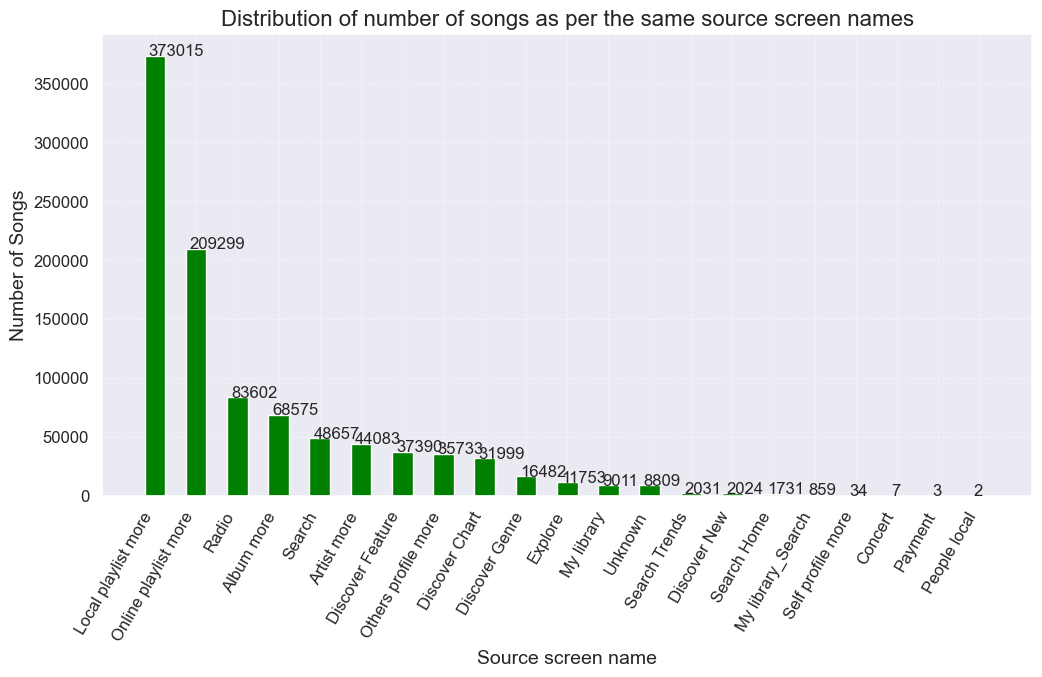

In [114]:
source_screen_counts = test['source_screen_name'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(source_screen_counts.index, source_screen_counts.values, color='green', width=0.5)

ax.set_title('Distribution of number of songs as per the same source screen names', fontsize=16)
ax.set_xlabel('Source screen name', fontsize=14)
ax.set_ylabel('Number of Songs', fontsize=14)

ax.tick_params(axis='both', labelsize=12)

ax.set_xticklabels(source_screen_counts.index, rotation=60, ha='right')

for i, v in enumerate(source_screen_counts.values):
    ax.text(i - 0.15, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

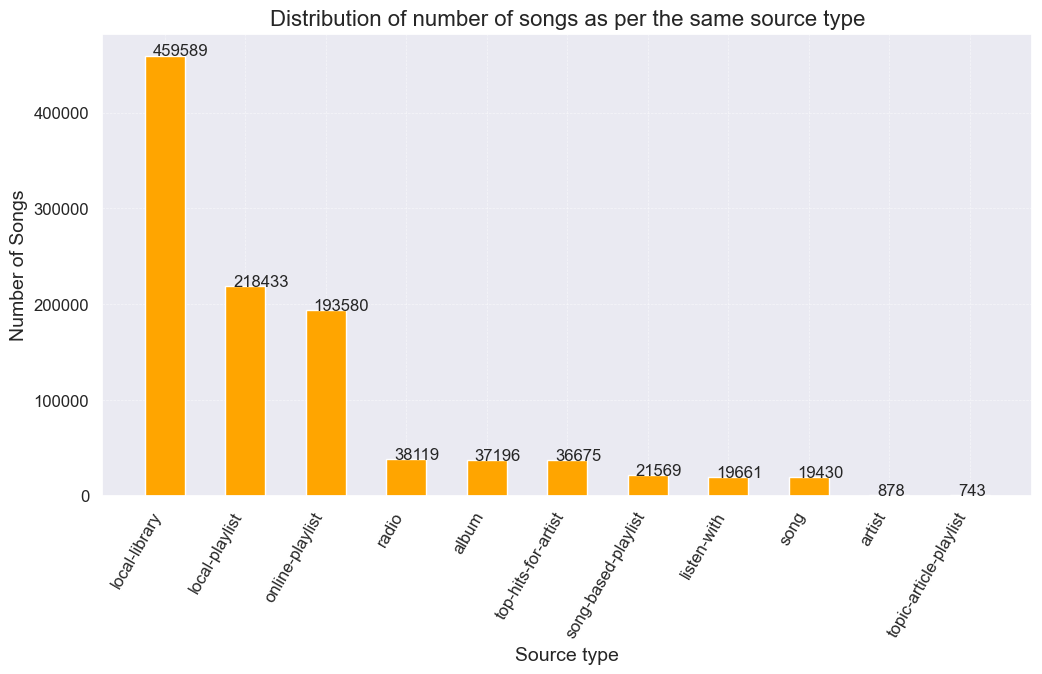

In [115]:
source_type_counts = train['source_type'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(source_type_counts.index, source_type_counts.values, color='orange', width=0.5)

ax.set_title('Distribution of number of songs as per the same source type', fontsize=16)
ax.set_xlabel('Source type', fontsize=14)
ax.set_ylabel('Number of Songs', fontsize=14)

ax.tick_params(axis='both', labelsize=12)

ax.set_xticklabels(source_type_counts.index, rotation=60, ha='right')

for i, v in enumerate(source_type_counts.values):
    ax.text(i - 0.15, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

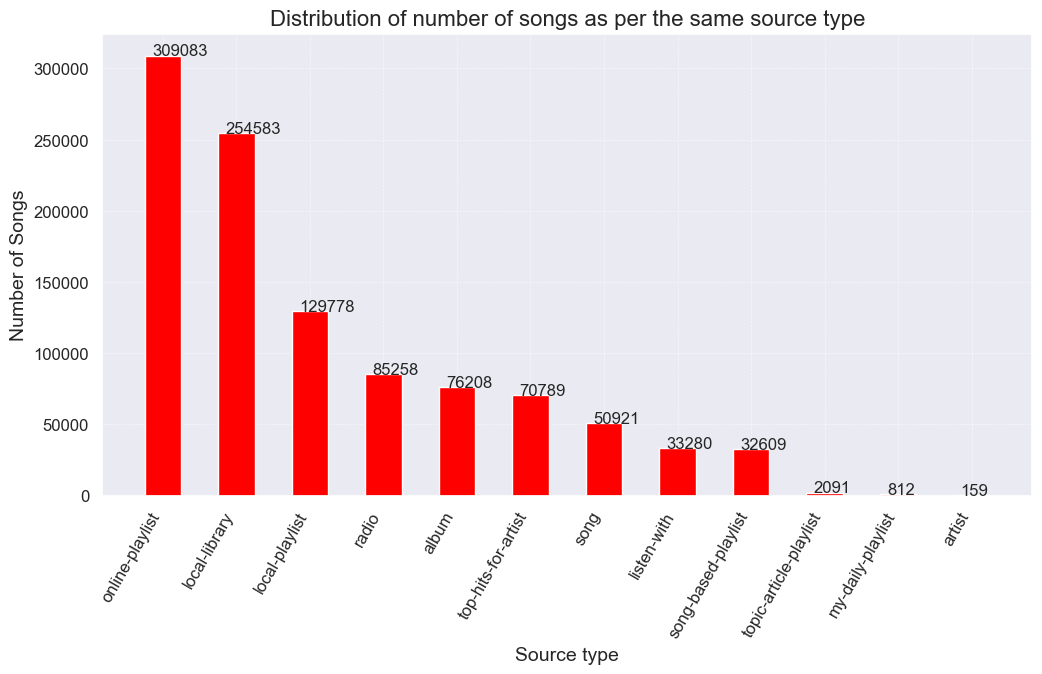

In [116]:
source_type_counts = test['source_type'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(source_type_counts.index, source_type_counts.values, color='red', width=0.5)

ax.set_title('Distribution of number of songs as per the same source type', fontsize=16)
ax.set_xlabel('Source type', fontsize=14)
ax.set_ylabel('Number of Songs', fontsize=14)

ax.tick_params(axis='both', labelsize=12)

ax.set_xticklabels(source_type_counts.index, rotation=60, ha='right')

for i, v in enumerate(source_type_counts.values):
    ax.text(i - 0.15, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

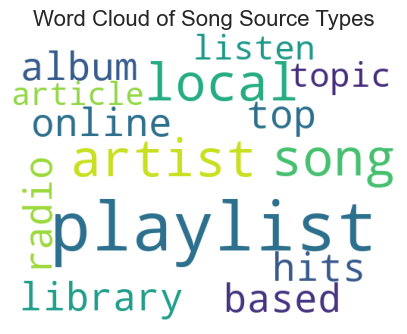

In [117]:
temp1 = train.source_type.dropna(False)
source_typ = temp1.unique()
plt.subplots(figsize=(5, 5))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(source_typ))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of Song Source Types', fontsize=16)  # Adjust the title
plt.show()

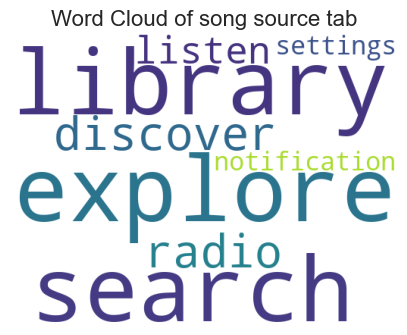

In [118]:
temp2 = train.source_system_tab.dropna(False)
source_sys_tab = temp2.unique()
plt.subplots(figsize=(5, 5))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(source_sys_tab))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of song source tab', fontsize=16)  # Adjust the title
plt.show()

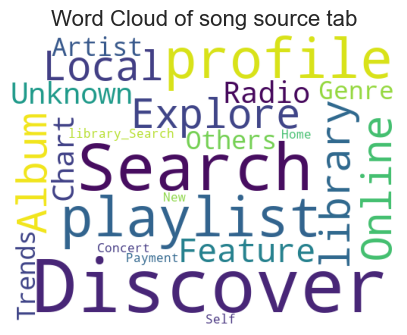

In [119]:
temp3 = train.source_screen_name.dropna(False)
src_screen_cnt = temp3.unique()
plt.subplots(figsize=(5, 5))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(src_screen_cnt))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of song source tab', fontsize=16)  # Adjust the title
plt.show()

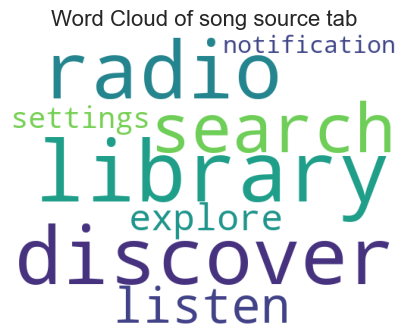

In [120]:
temp2 = test.source_system_tab.dropna(False)
source_sys_tab = temp2.unique()
plt.subplots(figsize=(5, 5))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(source_sys_tab))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of song source tab', fontsize=16)  # Adjust the title
plt.show()

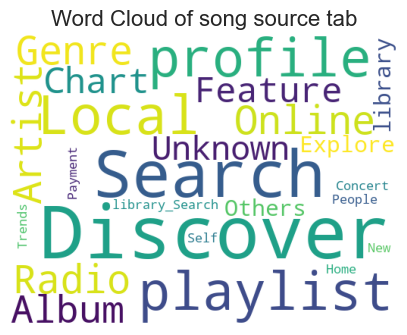

In [121]:
temp3 = test.source_screen_name.dropna(False)
src_screen_cnt = temp3.unique()
plt.subplots(figsize=(5, 5))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(src_screen_cnt))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of song source tab', fontsize=16)  # Adjust the title
plt.show()

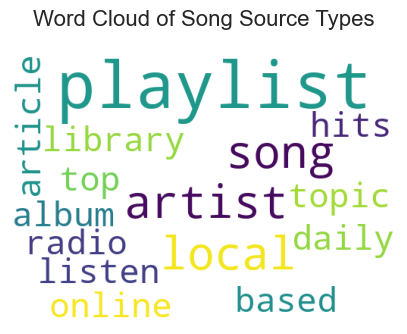

In [122]:
temp1 = test.source_type.dropna(False)
source_typ = temp1.unique()
plt.subplots(figsize=(5, 5))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(source_typ))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of Song Source Types', fontsize=16)  # Adjust the title
plt.show()

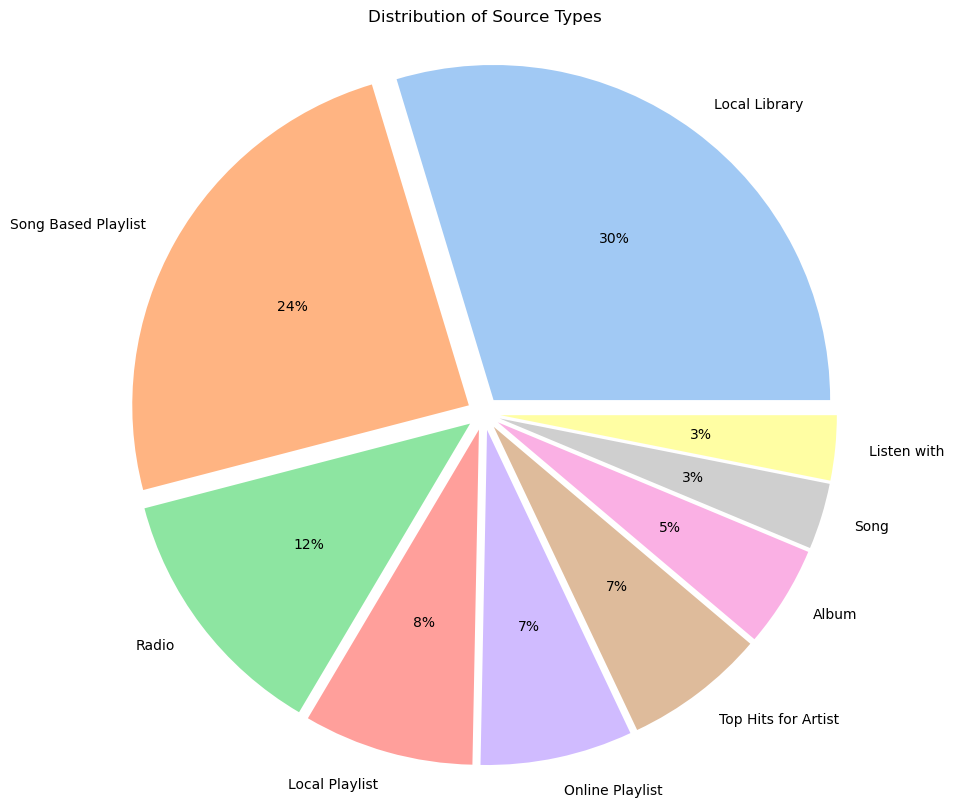

In [105]:
labels = ['Local Library', 'Song Based Playlist', 'Radio', 'Local Playlist', 'Online Playlist', 'Top Hits for Artist', 'Album', 'Song', 'Listen with']
source_typ_percent = [29.56, 24.34, 12.41, 8.15, 7.29, 6.77, 4.87, 3.18, 3.12]

colors = sns.color_palette('pastel')[0:10]

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)  # Explode slice

plt.figure(figsize=(10, 10))
plt.title('Distribution of Source Types')
plt.pie(source_typ_percent, labels=labels, colors=colors, explode=explode, autopct='%.0f%%')
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()

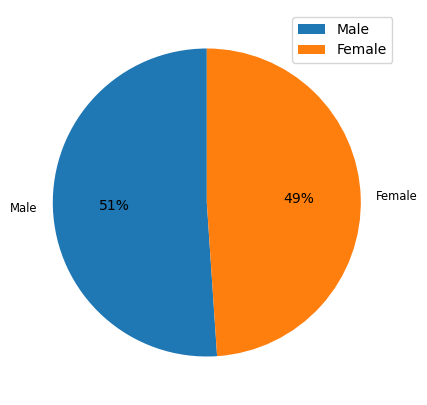

In [109]:
mpl.rcParams['font.size'] = 10.0
labels = ['Male','Female']
plt.figure(figsize = (5, 5))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%.0f%%', shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

Text(0.5, 0, 'Registration Time ')

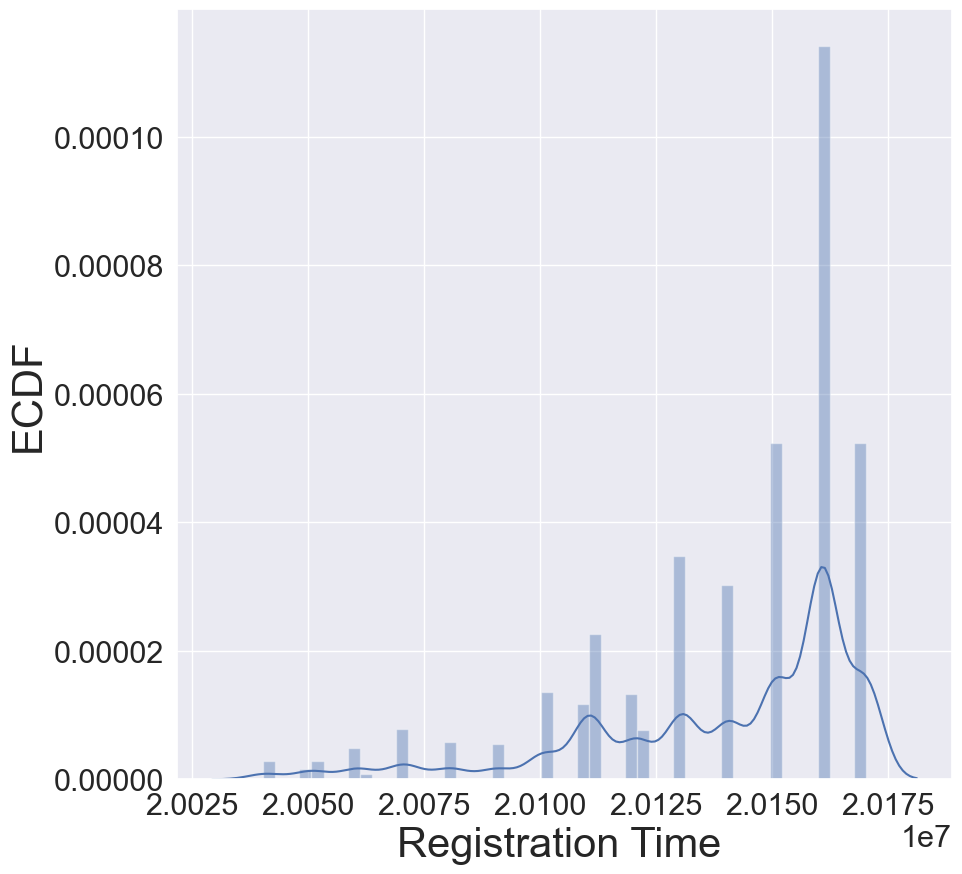

In [126]:
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (10, 10)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.ylabel('ECDF',fontsize=30)
plt.xlabel('Registration Time ' ,fontsize=30)

In [128]:
train_songs = pd.merge(train, songs, on = 'song_id', how = 'outer')
train_members = pd.merge(train, members, on = 'msno', how = 'inner')
test_songs = pd.merge(test, songs, on = 'song_id', how = 'outer')
test_members = pd.merge(test, members, on = 'msno', how = 'inner')

<Axes: >

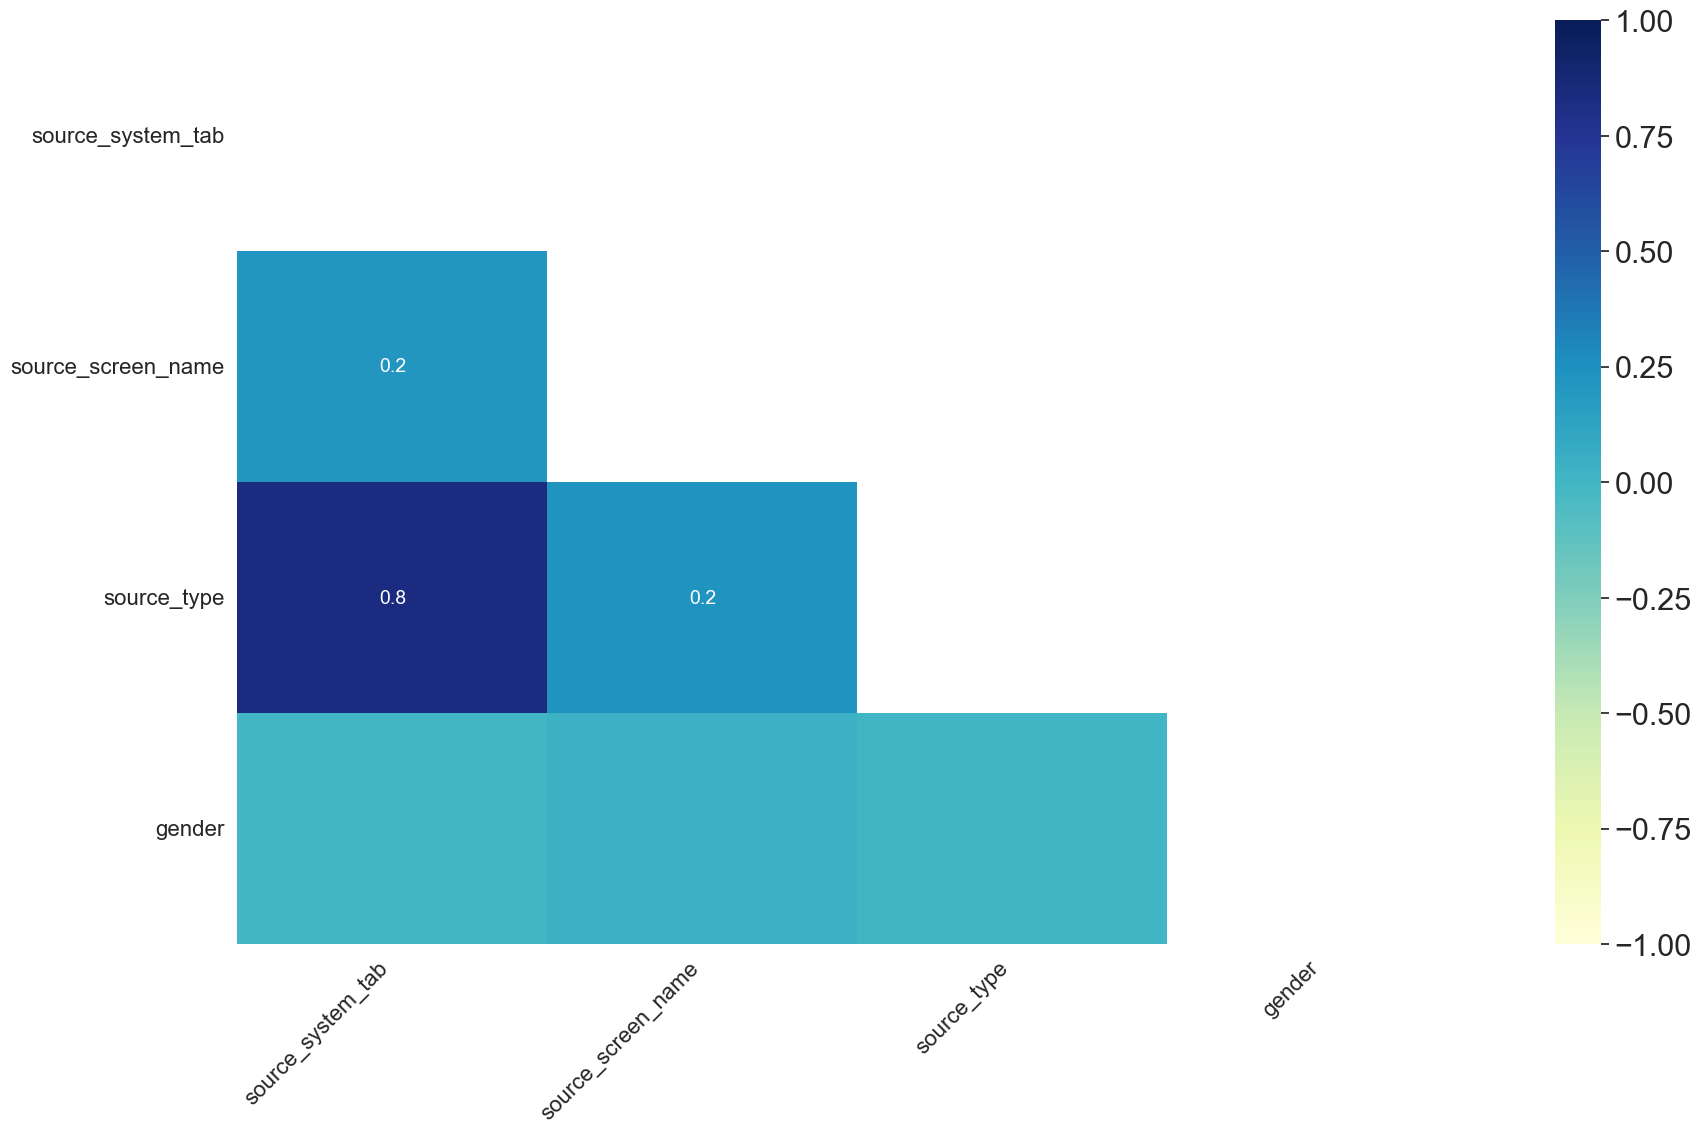

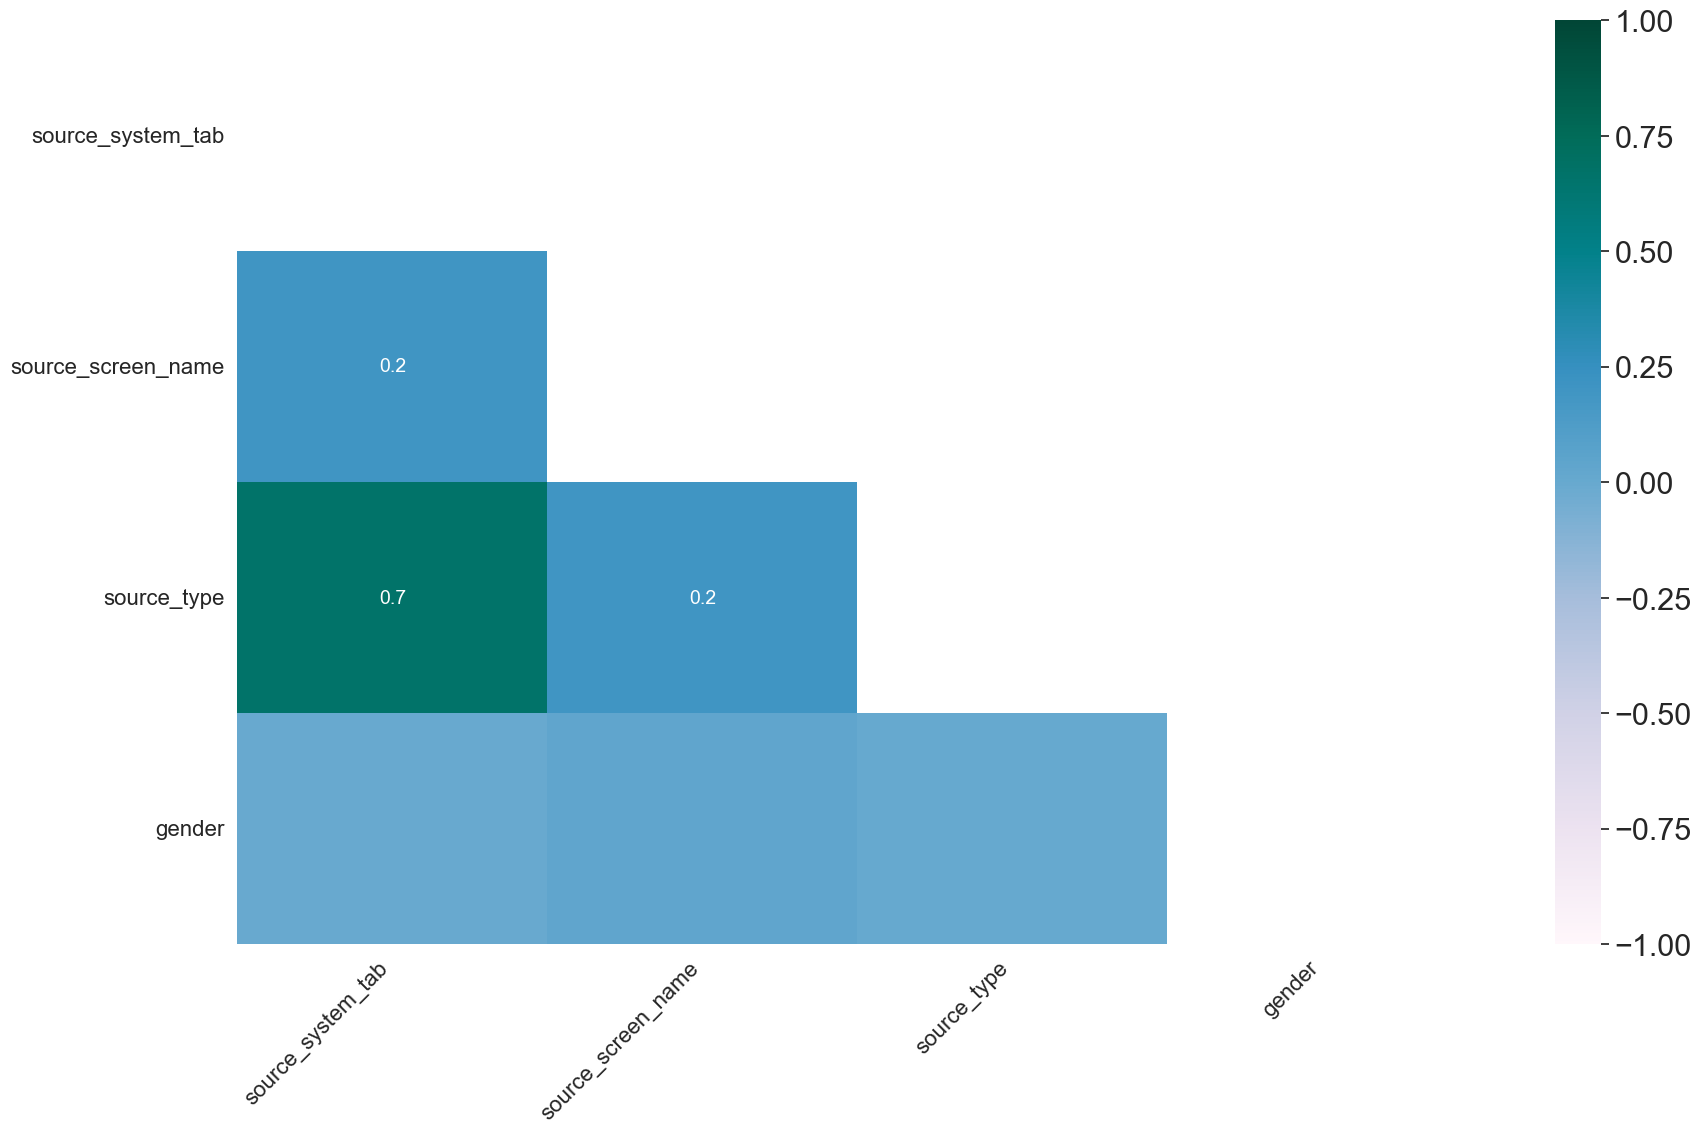

In [134]:
msno.heatmap(train_members, cmap = "YlGnBu")
msno.heatmap(test_members, cmap = "PuBuGn")

[Text(0, 0, 'Album more'),
 Text(1, 0, 'Artist more'),
 Text(2, 0, 'Concert'),
 Text(3, 0, 'Discover Chart'),
 Text(4, 0, 'Discover Feature'),
 Text(5, 0, 'Discover Genre'),
 Text(6, 0, 'Discover New'),
 Text(7, 0, 'Explore'),
 Text(8, 0, 'Local playlist more'),
 Text(9, 0, 'My library'),
 Text(10, 0, 'My library_Search'),
 Text(11, 0, 'Online playlist more'),
 Text(12, 0, 'Others profile more'),
 Text(13, 0, 'Payment'),
 Text(14, 0, 'Radio'),
 Text(15, 0, 'Search'),
 Text(16, 0, 'Search Home'),
 Text(17, 0, 'Search Trends'),
 Text(18, 0, 'Self profile more'),
 Text(19, 0, 'Unknown')]

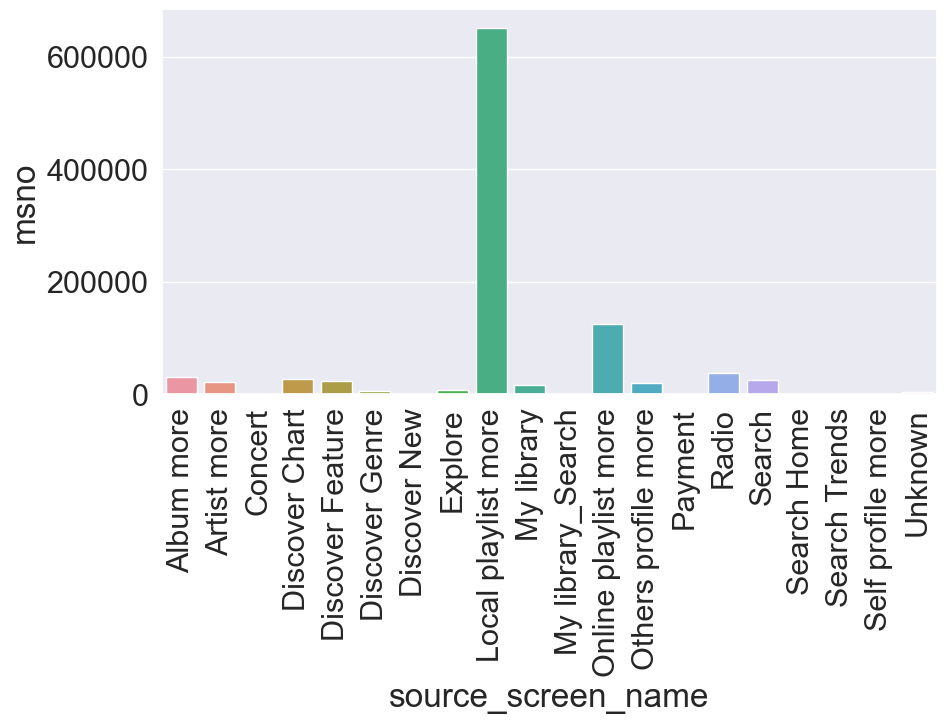

In [139]:
data = train_members.groupby('source_screen_name').aggregate({'msno':'count'}).reset_index()
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_screen_name', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'discover'),
 Text(1, 0, 'explore'),
 Text(2, 0, 'listen with'),
 Text(3, 0, 'my library'),
 Text(4, 0, 'notification'),
 Text(5, 0, 'radio'),
 Text(6, 0, 'search'),
 Text(7, 0, 'settings')]

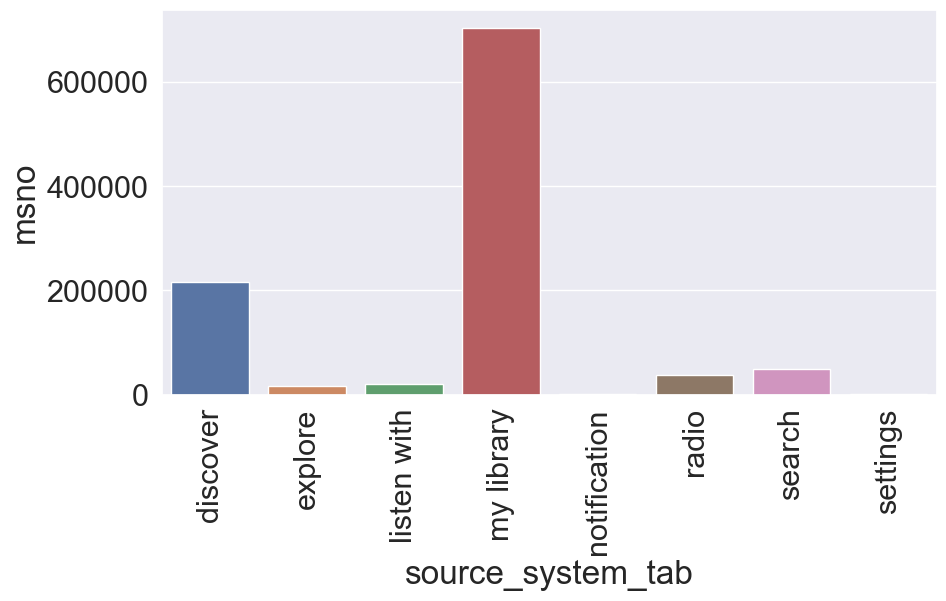

In [141]:
data = train_members.groupby('source_system_tab').aggregate({'msno':'count'}).reset_index()
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_system_tab', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'album'),
 Text(1, 0, 'artist'),
 Text(2, 0, 'listen-with'),
 Text(3, 0, 'local-library'),
 Text(4, 0, 'local-playlist'),
 Text(5, 0, 'online-playlist'),
 Text(6, 0, 'radio'),
 Text(7, 0, 'song'),
 Text(8, 0, 'song-based-playlist'),
 Text(9, 0, 'top-hits-for-artist'),
 Text(10, 0, 'topic-article-playlist')]

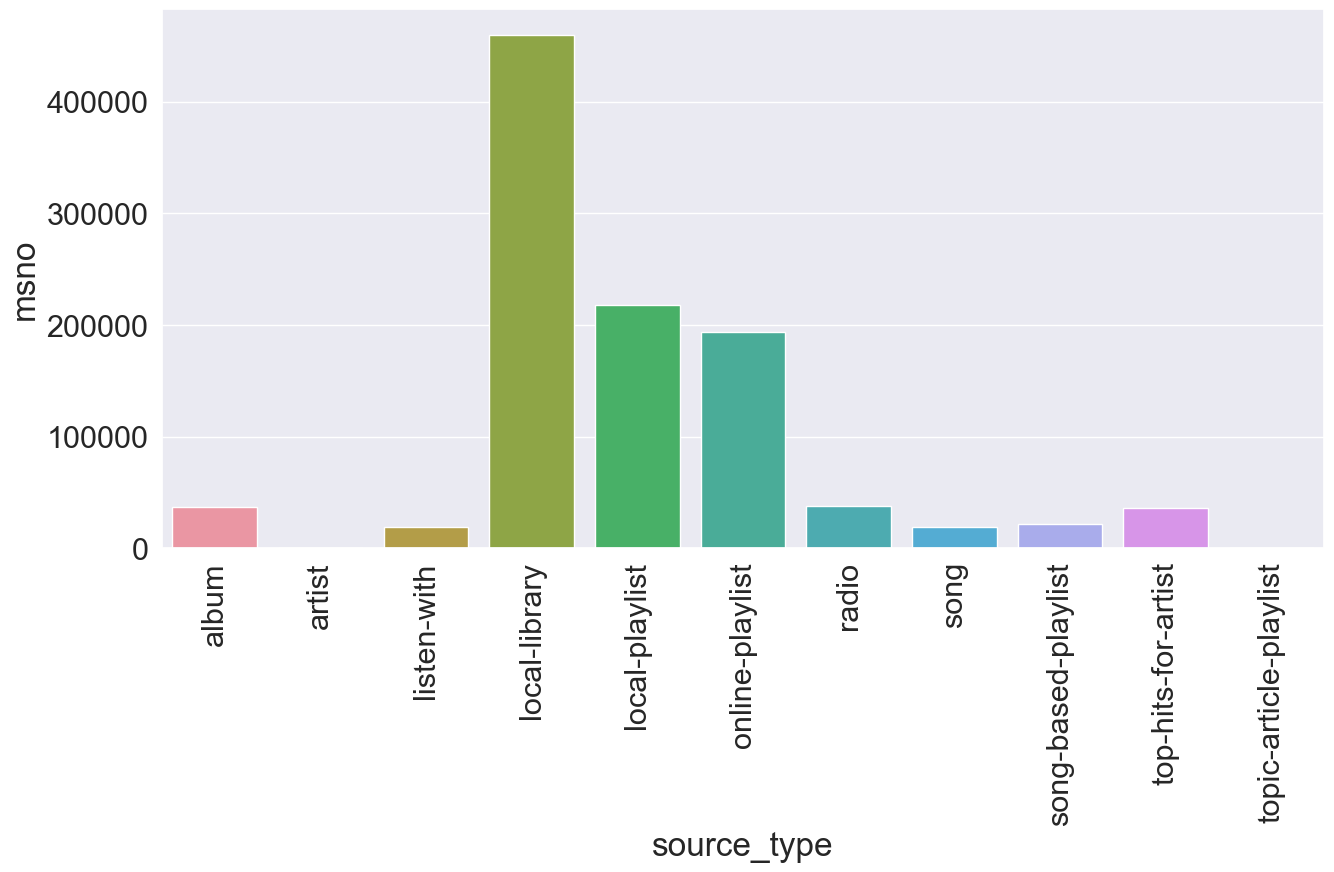

In [142]:
data = train_members.groupby('source_type').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_type', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '7'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '11'),
 Text(10, 0, '12'),
 Text(11, 0, '13'),
 Text(12, 0, '14'),
 Text(13, 0, '15'),
 Text(14, 0, '16'),
 Text(15, 0, '17'),
 Text(16, 0, '18'),
 Text(17, 0, '19'),
 Text(18, 0, '20'),
 Text(19, 0, '21'),
 Text(20, 0, '22')]

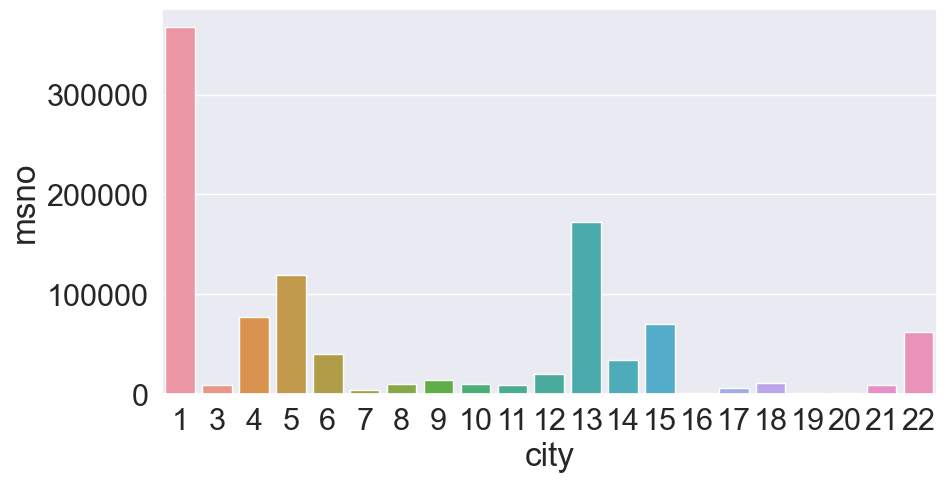

In [146]:
data = train_members.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)

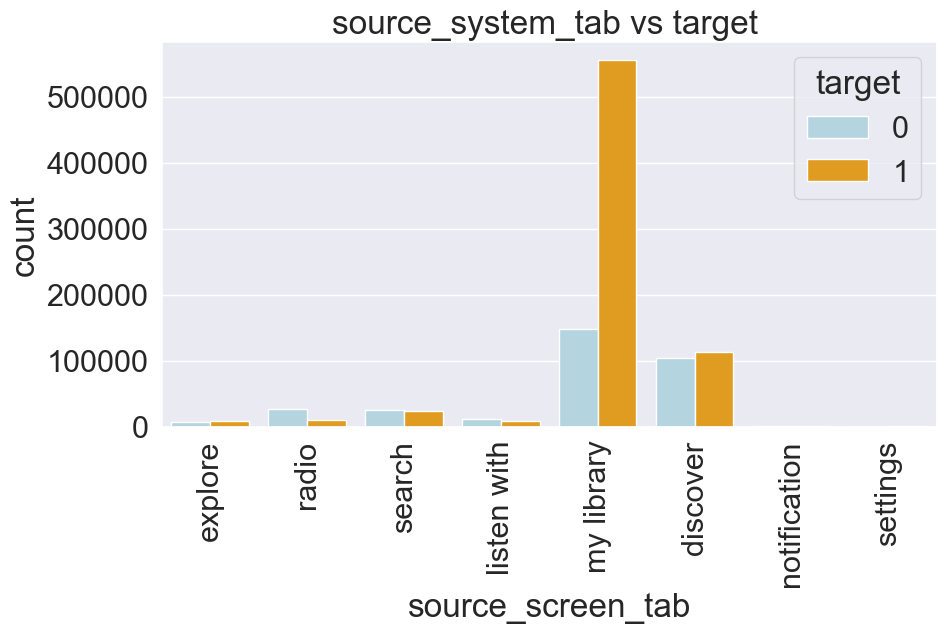

In [150]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_system_tab",data=train_members,palette=['lightblue','orange','green'],hue="target")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("source_screen_tab")
plt.ylabel("count")
plt.title("source_system_tab vs target ")
plt.show()

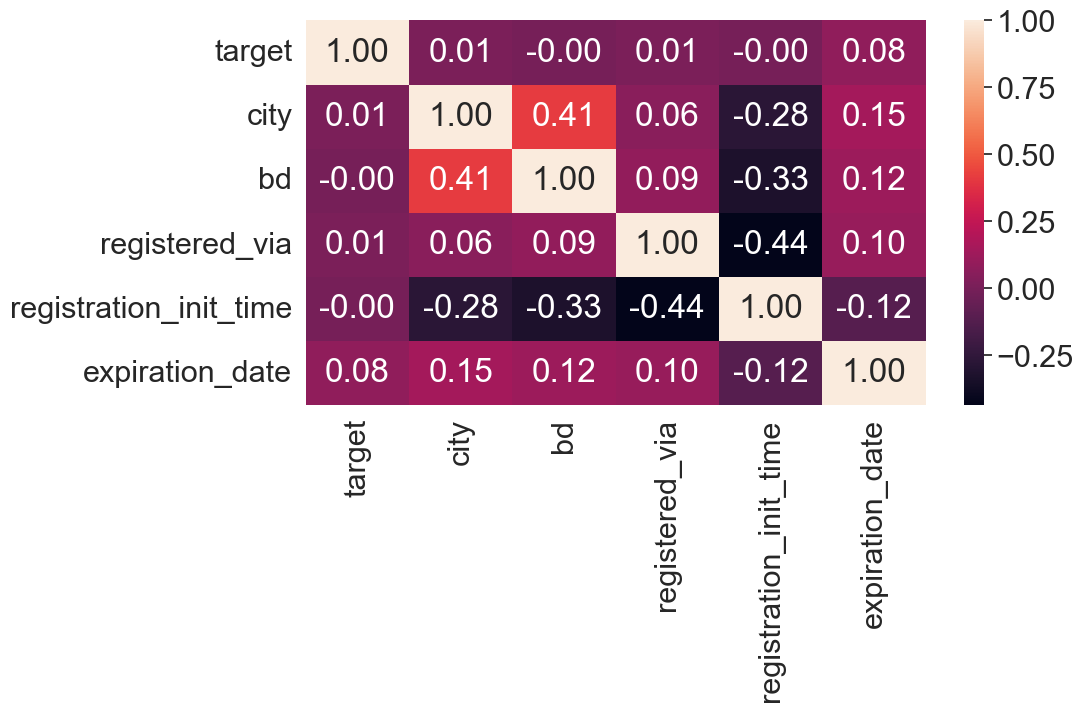

In [152]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.heatmap(data=train_members.corr(),annot=True,fmt=".2f")

In [170]:
df = pd.merge(train, songs, on='song_id', how='left')

# Load and join songs data
df = pd.merge(df, members, on='msno', how='left')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   msno                    1048575 non-null  object 
 1   song_id                 1048575 non-null  object 
 2   source_system_tab       1045469 non-null  object 
 3   source_screen_name      1000397 non-null  object 
 4   source_type             1045873 non-null  object 
 5   target                  1048575 non-null  int64  
 6   song_length             1048558 non-null  float64
 7   genre_ids               1033256 non-null  object 
 8   artist_name             1048558 non-null  object 
 9   composer                825385 non-null   object 
 10  lyricist                617815 non-null   object 
 11  language                1048551 non-null  float64
 12  city                    1048575 non-null  int64  
 13  bd                      1048575 non-null  int64  
 14  ge

In [172]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,1.048575e+06,1.048558e+06,1.048551e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.894318e-01,2.454568e+05,1.844842e+01,7.530954e+00,1.737240e+01,6.766241e+00,2.012798e+07,2.017149e+07
std,4.627265e-01,5.804048e+04,2.112975e+01,6.589138e+00,2.076293e+01,2.300233e+00,2.970024e+04,3.920821e+03
min,0.000000e+00,2.716000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,2.004102e+07
25%,0.000000e+00,2.154570e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011072e+07,2.017091e+07
50%,1.000000e+00,2.424160e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013110e+07,2.017093e+07
75%,1.000000e+00,2.727180e+05,5.200000e+01,1.300000e+01,2.800000e+01,9.000000e+00,2.015101e+07,2.017101e+07
max,1.000000e+00,7.371499e+06,5.900000e+01,2.200000e+01,1.030000e+03,1.300000e+01,2.016120e+07,2.020102e+07


In [173]:
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [174]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


In [175]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

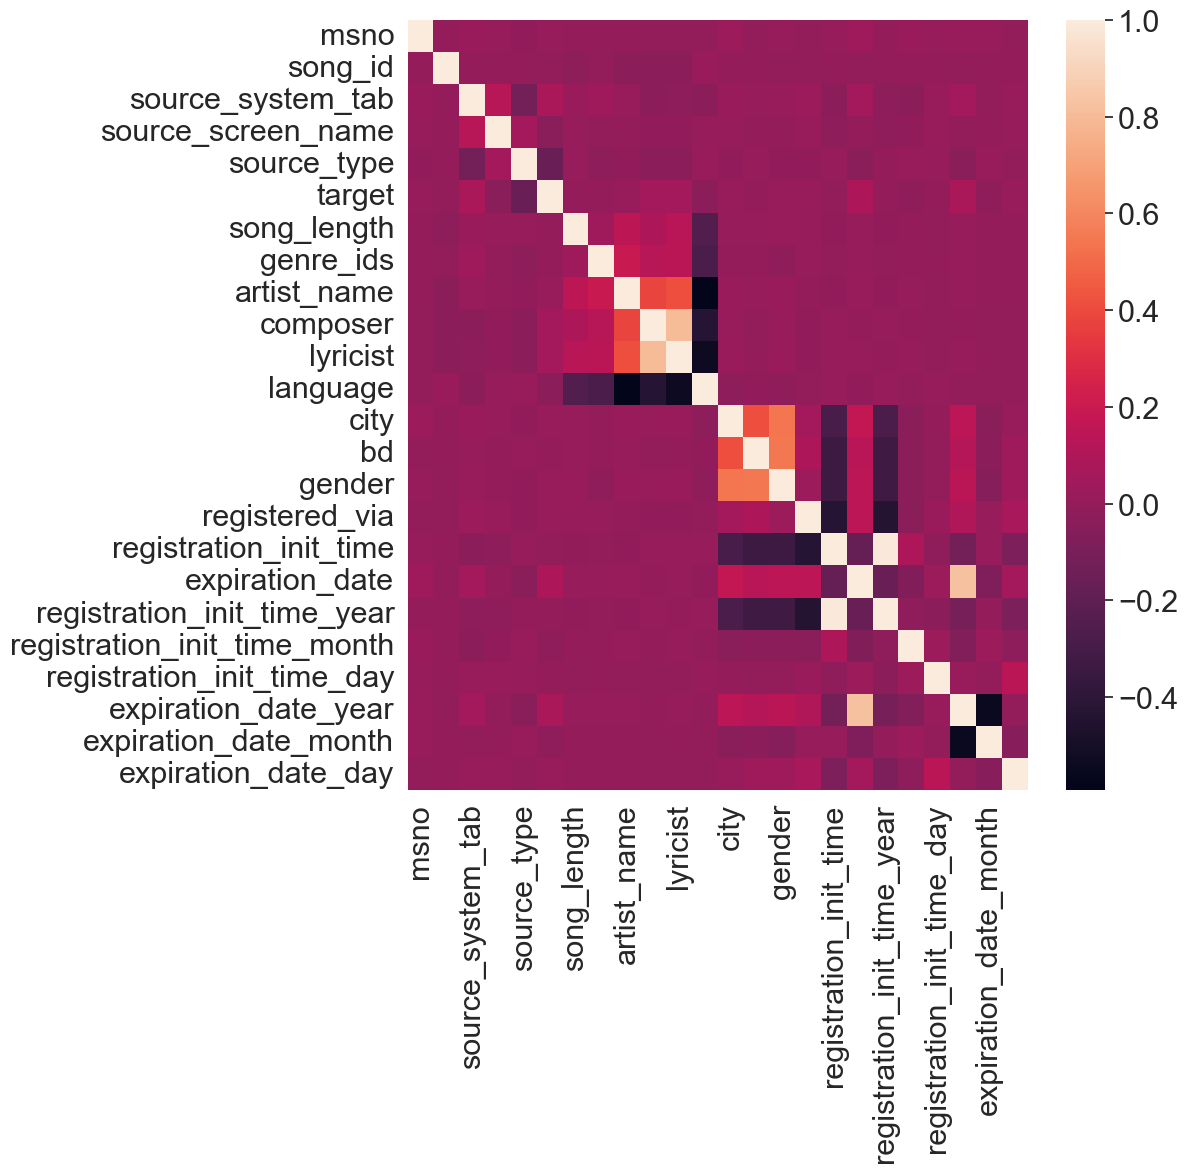

In [165]:
# Сorrelation matrix
plt.figure(figsize=[10,10])
sns.heatmap(df.corr())
plt.show()

**Splitting Data to train and test the Random Forest Classifier and XGB Classifier model**

In [184]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)

**Training and using Random Forest Classifier model for making predictions**

In [187]:
df = df.dropna()
rfc_model = RandomForestClassifier(n_estimators=250, max_depth=25)
rfc_model.fit(train_data, train_labels)
y_pred = rfc_model.predict(test_data)

**Displaying Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, Accuracy, F1 score, R2 score, complete report for the Random Forest Classifier**

In [201]:
print("Mean absolute error: ", mean_absolute_error(test_labels, y_pred))
print("Mean squared error: ", mean_squared_error(test_labels, y_pred))
print("Root Mean squared error: ", math.sqrt(mean_absolute_error(test_labels, y_pred)))
print("Accuracy: ", round(accuracy_score(test_labels, y_pred)*100, 2),"%")
print("F1 score: ", f1_score(test_labels, y_pred))
print("R2 score: ", r2_score(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

Mean absolute error:  0.19978319335211053
Mean squared error:  0.19978319335211053
Root Mean squared error:  0.44697113257134463
Accuracy:  80.02 %
F1 score:  0.8650227557308142
R2 score:  0.06665300926695095
              precision    recall  f1-score   support

           0       0.76      0.52      0.62     97640
           1       0.81      0.93      0.87    216926

    accuracy                           0.80    314566
   macro avg       0.79      0.72      0.74    314566
weighted avg       0.80      0.80      0.79    314566



**Training and using XGB Classifier model for making predictions**

In [190]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
xgb_model.fit(train_data, train_labels)
xgb_predict = xgb_model.predict(test_data)

**Displaying Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, Accuracy, F1 score, R2 score, complete report for the XGB Classifier**

In [203]:
print("Mean absolute error: ", mean_absolute_error(test_labels, xgb_predict))
print("Mean squared error: ", mean_squared_error(test_labels, xgb_predict))
print("Root Mean squared error: ", math.sqrt(mean_absolute_error(test_labels, xgb_predict)))
print("Accuracy: ", round(accuracy_score(test_labels, xgb_predict)*100, 2), "%")
print("F1 score: ", f1_score(test_labels, xgb_predict))
print("R2 score: ", r2_score(test_labels, xgb_predict))
print(classification_report(test_labels, xgb_predict))

Mean absolute error:  0.1852933883509343
Mean squared error:  0.1852933883509343
Root Mean squared error:  0.43045718527042187
Accuracy:  81.47 %
F1 score:  0.8719560819048748
R2 score:  0.13434647070002026
              precision    recall  f1-score   support

           0       0.76      0.59      0.66     97640
           1       0.83      0.91      0.87    216926

    accuracy                           0.81    314566
   macro avg       0.80      0.75      0.77    314566
weighted avg       0.81      0.81      0.81    314566



**Concluding my music recommendation project journey! 🎵✨**\
*Utilizing Random Forest and XGB Classifiers, I've achieved accuracy rates of 80.02% and 81.47% respectively. These results underscore the effectiveness of the recommendation system, guiding users to tunes that resonate. Root Mean Squared Error and Mean Absolute Error validate the predictions' reliability. Excited about this impactful project! 🎉🎶*